In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
def frequency_filter(y, Fs):
    plt.figure(figsize=(20,10))
    
    N = len(y)
    T = 1/Fs
    x = np.linspace(0, N*T, N)
    
    y_fft = np.fft.fft(y)
    x_fft = np.linspace(0,1/(2*T),N/2)
    
    singlefft = (2/N)*np.abs(y_fft[:N//2])
    sns.lineplot(x_fft,singlefft)
    return singlefft, x_fft

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


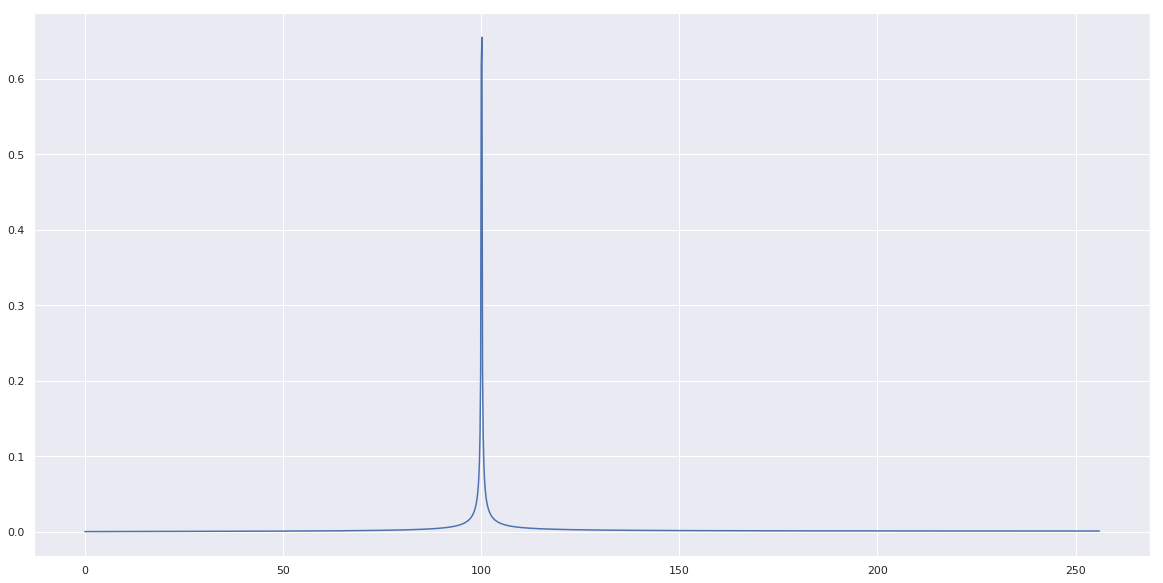

In [3]:
x = np.linspace(-np.pi,np.pi, 2*np.pi*512)
y = np.sin(2*np.pi*100*x)

Y, X = frequency_filter(y,512)

In [4]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * (fs)
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


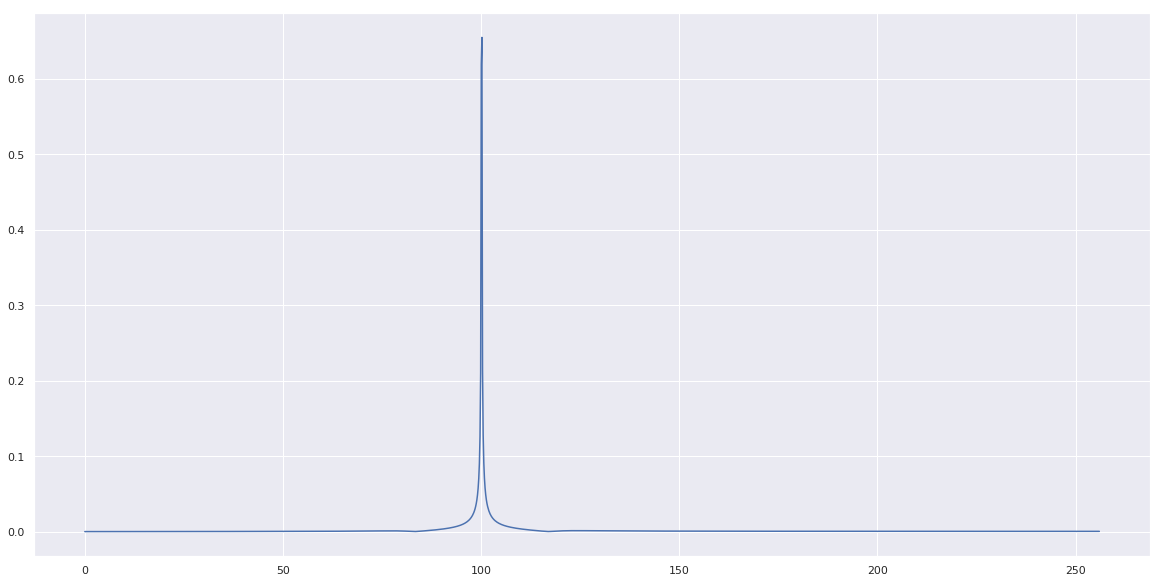

In [6]:
Y_filtered = butter_bandpass_filter(y, 80, 120, 512, order=5)
#Y_filtered = [x[0] for x in Y_filtered]

Y, X = frequency_filter(Y_filtered,512)